In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from operator import add
import math
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('Framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
data = data.rename(columns={'male':'sex'})
data

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
#We drop the eductaion column

data.drop('education', axis=1, inplace=True)
data

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [6]:
data.dropna(axis=0, inplace=True)
data

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


#### Feature Engineering:

- We will make use of the Boruta algorithm which is a wrappper built around the random forest classification algorithm. The<br> concept is thus trying to capture all the important features in our data set with respect to an outcome variable.

#### How it works

- First, it adds randomness to the given dataset by creating shuffed copies of all features (called shadow features).

In [7]:
from boruta import BorutaPy

#Define the features

X = data.iloc[:,: -1].values

y = data.iloc[:, -1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

#We next define Boruta feature selection method

feat_select = BorutaPy(forest, n_estimators='auto', verbose=2)

#Find all relevant features by fitting the boruta to out dataset

feat_select.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x17203975040),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x17203975040, verbose=2)

In [8]:
# Let us show the most import columns
important_columns = data.columns[:-1][feat_select.support_].tolist()
important_columns

['age', 'sysBP']

This confirms what we saw earlier in the correlation analysis. The <i>age and sysBP</i> were the most significant to predict<br> int determining the<i> TenYearCHD.</i>


However, we would add more features to our analysis.

In [9]:
#We now select the more important features

best_feats = data.columns[:-1][feat_select.ranking_ <=6].tolist()
best_feats

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

#### Statistics of the best_feats

In [10]:
import statsmodels.api as sm

In [11]:
X_best = data[best_feats]
y = data['TenYearCHD']

In [12]:
res = sm.Logit(y, X_best).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.416958
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Sat, 19 Aug 2023   Pseudo R-squ.:                 0.02354
Time:                        10:38:01   Log-Likelihood:                -1564.0
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 3.174e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0223      0.006      3.982      0.000       0.011       0.033
totChol       -0.0029      0.001     -2.716      0.007      -0.005      -0.001
sysBP          0.0245      0.003      7.436      0.000       0.018       0.031
diaBP         -0.0270      0.006     -4.603      0.000      -0.038      -0.015
BMI           -0.0499      0.012     -4.185      0.000      -0.073      -0.027
heartRate     -0.0298      0.004     -8.064      0.000      -0.037      -0.023
glucose        0.0043      0.002      2.616      0.009       0.001       0.007
==============================================================================
"""

In [13]:
params = res.params
conf = res.conf_int()
conf['Odds ratio'] = params
conf.columns = ['5%', '95%', 'Odds ratio']
print(np.exp(conf))

                 5%       95%  Odds ratio
age        1.011381  1.033813    1.022536
totChol    0.994963  0.999184    0.997071
sysBP      1.018236  1.031493    1.024843
diaBP      0.962258  0.984627    0.973378
BMI        0.929304  0.973798    0.951291
heartRate  0.963690  0.977730    0.970685
glucose    1.001074  1.007518    1.004291


- We observe that with all other features constant, the odds of getting CHD increases with about 2% for every increase in age<br> and sysBP.
<br>

- Other features show no significant relation to TenYearCHD.

### Models and predictions

Our dataset is imbalanced i.e for every positive cases theres are about 6 negative cases. Hence, we may end up with a <br>classifier that mostly predicts the negative classes with a high accuracy but misses out some sensitive aspects<br>
<br>

- To balance our dataset we will use the Synthetic Minorizy Oversampling Technique (SMOTE).

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [15]:
X = data[best_feats]
y = data.iloc[:,-1]

In [16]:
# let's get the numbers before applying SMOTE

num_before = dict(Counter(y))

#Now applying SMOTE

#Define pipeline

over = SMOTE(sampling_strategy=0.8)

under = RandomUnderSampler(sampling_strategy=0.8)

steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)

# Get the numbers after SMOTE
num_after = dict(Counter(y_smote))

print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


#### Let us plot the data before and after SMOTE

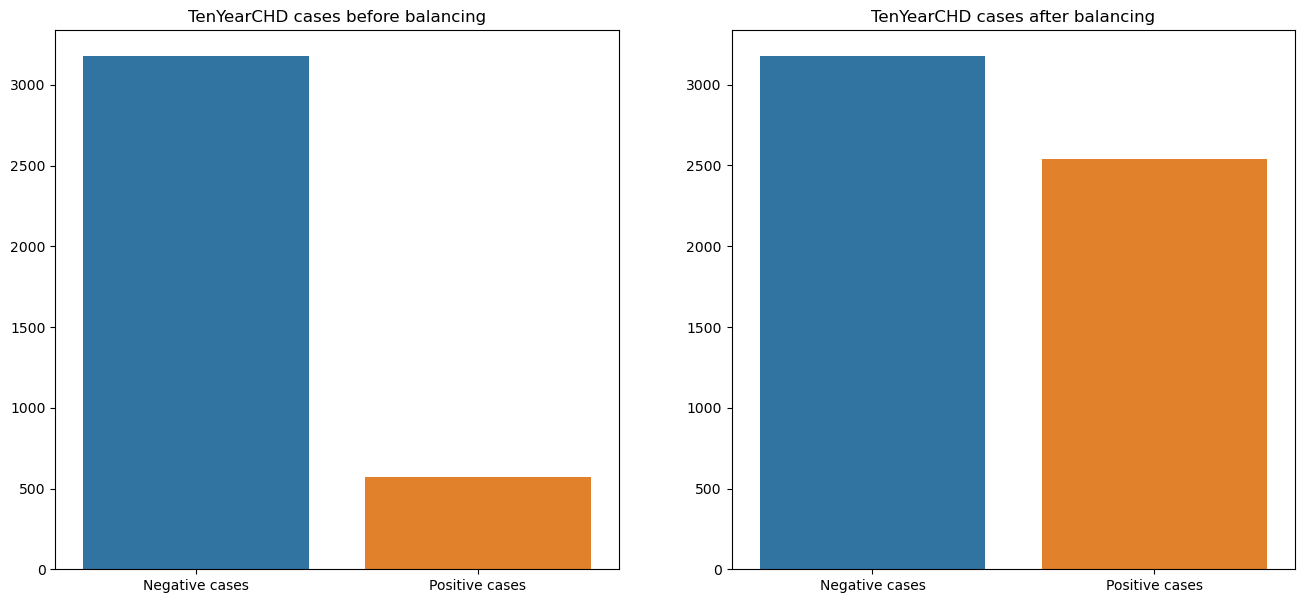

In [17]:
labels = ['Negative cases', 'Positive cases']

plt.figure(figsize=(16,7))

plt.subplot(1,2,1)

sns.barplot(labels, list(num_before.values()))

plt.title('TenYearCHD cases before balancing')

plt.subplot(1,2,2)

sns.barplot(labels, list(num_after.values()))

plt.title('TenYearCHD cases after balancing')

plt.show()



#### We next split the data into training and testing set

In [18]:
# We create a new dataset using the X_smote and y_smote

data_new = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

#list the columns we want to use

data_new.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

data_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,55,226.0,141.0,84.0,27.60,69.0,73.0,0
1,42,216.0,124.0,82.0,28.74,70.0,67.0,0
2,40,143.0,125.5,80.0,21.99,71.0,95.0,0
3,63,230.0,152.5,88.0,24.10,72.0,74.0,0
4,39,253.0,159.0,115.0,32.66,110.0,74.0,0


In [19]:
X_new = data_new[best_feats]

y_new = data_new.iloc[:,-1]

X_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,55,226.0,141.0,84.0,27.60,69.0,73.0
1,42,216.0,124.0,82.0,28.74,70.0,67.0
2,40,143.0,125.5,80.0,21.99,71.0,95.0
3,63,230.0,152.5,88.0,24.10,72.0,74.0
4,39,253.0,159.0,115.0,32.66,110.0,74.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

#### SCALING

In [21]:
#We are using the StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)

X_test = pd.DataFrame(X_test_scaled)


In [22]:
#We first try the logisticReegressor classifier model

model = LogisticRegression()

#Fit the model to our training data

model.fit(X_train, y_train)

#Get the model predition

prediction = model.predict(X_test)

#Let us get the model score

model_score = cross_val_score(model, X_test, y_test, cv=10).mean()

#Let us get the model accuracy

accuracy = accuracy_score(y_test, prediction)*100

In [23]:
#We now print the following measurements

print(f'Logistic regression accuracy is: {round(accuracy, 2)}')
print(f'Model score: {round(model_score, 2)}')
print('Classification report:', classification_report(y_test, prediction))

Logistic regression accuracy is: 65.59
Model score: 0.65
Classification report:               precision    recall  f1-score   support

           0       0.68      0.75      0.71       656
           1       0.61      0.53      0.57       489

    accuracy                           0.66      1145
   macro avg       0.65      0.64      0.64      1145
weighted avg       0.65      0.66      0.65      1145



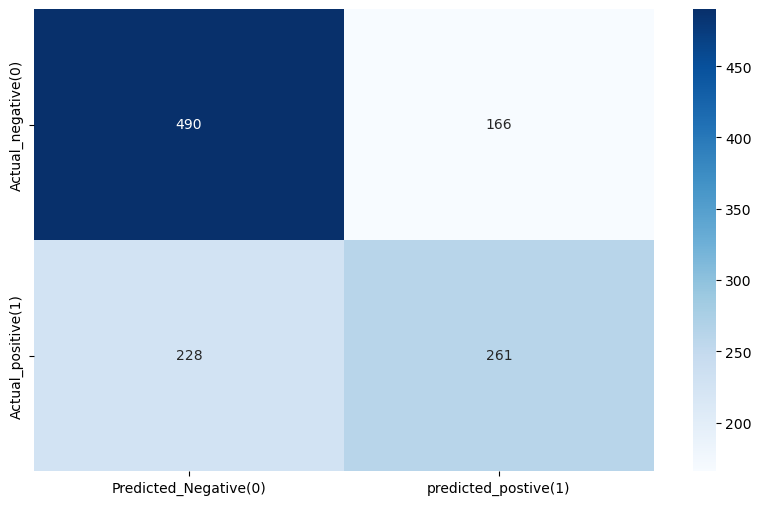

In [24]:
#Let us now show the confusion matrix predictions

conf_matrix = confusion_matrix(y_test, prediction)
conf_mat = pd.DataFrame(data=conf_matrix, columns=['Predicted_Negative(0)', 'predicted_postive(1)'], index=['Actual_negative(0)'
                                                                                                           , 'Actual_positive(1)'])
plt.figure(figsize=(10,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.show()

In [25]:
from sklearn.metrics import f1_score

In [26]:
f1_score_logistic = f1_score(y_test, prediction)
print(f'The f1 score for the logistic regression is: {round(f1_score_logistic*100, 2)}%')

The f1 score for the logistic regression is: 56.99%


#### We now define a funtion which takes a model and prints its accuracy, confusion matrix, crossvalidation score, f1_score<br>and classification report 

In [27]:
def model_metrics(model):
    clf = model
    
    #fit the classifier to the training dataset
    
    clf.fit(X_train, y_train)
    
    #predict using the test data
    
    prediction = clf.predict(X_test)
    
    #define the model score
    
    model_score = cross_val_score(clf, X_test, y_test, cv=3).mean()
    
    # Define the model accuracy
    
    model_accuracy = accuracy_score(y_test, prediction)*100
    
    # define f1 score
    
    clf_f1_score = f1_score(y_test, prediction)
    
    # Define the report of the model
    
    report = classification_report(y_test, prediction)
    
    # Define the confusion marix
    
    cm = confusion_matrix(y_test, prediction)
    conf_matrix = pd.DataFrame(data=cm, columns=['Predicted_negatives(0)', 'Predicted_positives(1)'], index=['Actual_negatives(0)', 
                                                                                                            'Actual_positives(1)'])
    plt.figure(figsize=(10,6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()
    
    #Next we print the following;
    
    print(f'Model score is: {round(model_score,2)}')
    print(f'Model accuracy is: {round(model_accuracy, 2)}%')
    print(f'The F1 score is: {round(clf_f1_score*100, 2)}%')
    print(f'Classification report for the model:', report)
          

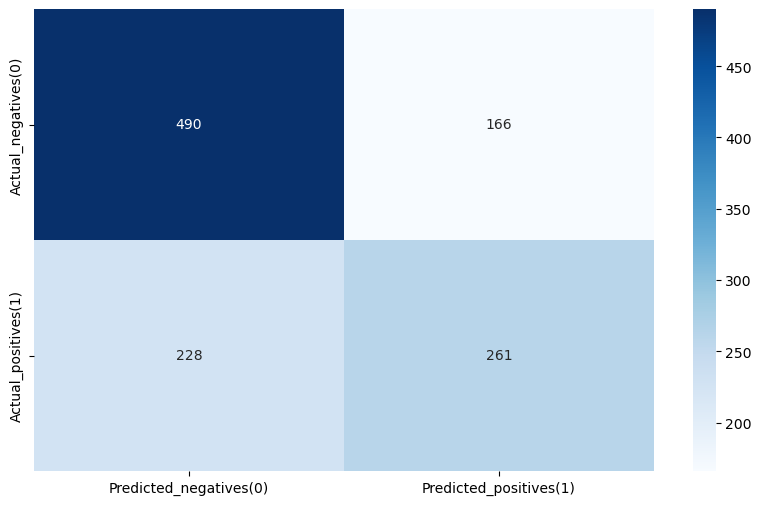

Model score is: 0.64
Model accuracy is: 65.59%
The F1 score is: 56.99%
Classification report for the model:               precision    recall  f1-score   support

           0       0.68      0.75      0.71       656
           1       0.61      0.53      0.57       489

    accuracy                           0.66      1145
   macro avg       0.65      0.64      0.64      1145
weighted avg       0.65      0.66      0.65      1145



In [28]:
model_metrics(LogisticRegression())

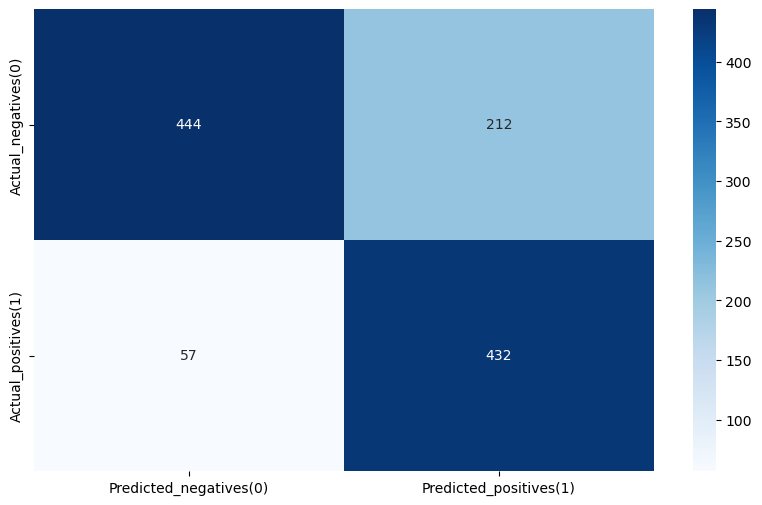

Model score is: 0.67
Model accuracy is: 76.51%
The F1 score is: 76.26%
Classification report for the model:               precision    recall  f1-score   support

           0       0.89      0.68      0.77       656
           1       0.67      0.88      0.76       489

    accuracy                           0.77      1145
   macro avg       0.78      0.78      0.77      1145
weighted avg       0.79      0.77      0.77      1145



In [29]:
model_metrics(KNeighborsClassifier())

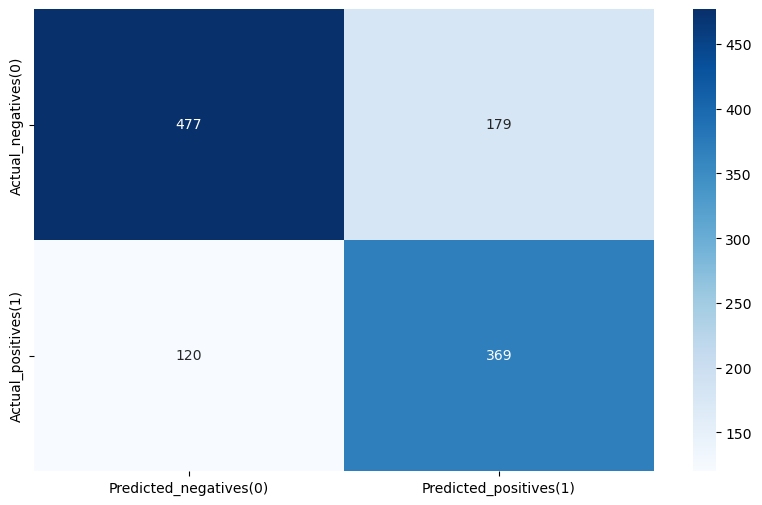

Model score is: 0.66
Model accuracy is: 73.89%
The F1 score is: 71.17%
Classification report for the model:               precision    recall  f1-score   support

           0       0.80      0.73      0.76       656
           1       0.67      0.75      0.71       489

    accuracy                           0.74      1145
   macro avg       0.74      0.74      0.74      1145
weighted avg       0.75      0.74      0.74      1145



In [30]:
from sklearn.tree import DecisionTreeClassifier
model_metrics(DecisionTreeClassifier())

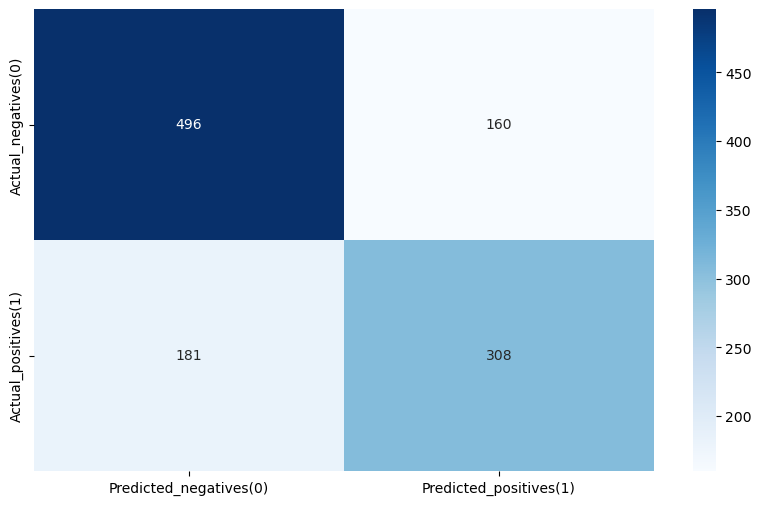

Model score is: 0.67
Model accuracy is: 70.22%
The F1 score is: 64.37%
Classification report for the model:               precision    recall  f1-score   support

           0       0.73      0.76      0.74       656
           1       0.66      0.63      0.64       489

    accuracy                           0.70      1145
   macro avg       0.70      0.69      0.69      1145
weighted avg       0.70      0.70      0.70      1145



In [31]:
from sklearn.svm import SVC
model_metrics(SVC())

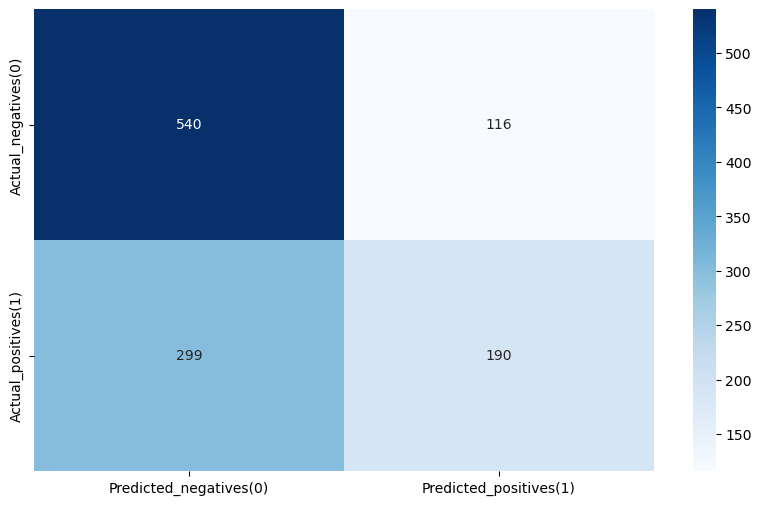

Model score is: 0.65
Model accuracy is: 63.76%
The F1 score is: 47.8%
Classification report for the model:               precision    recall  f1-score   support

           0       0.64      0.82      0.72       656
           1       0.62      0.39      0.48       489

    accuracy                           0.64      1145
   macro avg       0.63      0.61      0.60      1145
weighted avg       0.63      0.64      0.62      1145



In [32]:
model_metrics(GaussianNB())

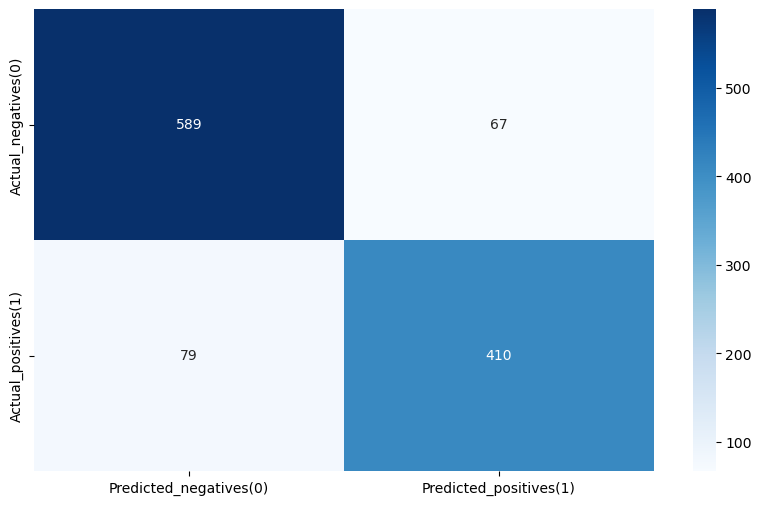

Model score is: 0.73
Model accuracy is: 87.25%
The F1 score is: 84.89%
Classification report for the model:               precision    recall  f1-score   support

           0       0.88      0.90      0.89       656
           1       0.86      0.84      0.85       489

    accuracy                           0.87      1145
   macro avg       0.87      0.87      0.87      1145
weighted avg       0.87      0.87      0.87      1145



In [33]:
model_metrics(RandomForestClassifier())

### Comparing our models based on Accuracy and F1 score.

In [34]:
comparison = pd.DataFrame({'K-Nearest Neighbor': {'Accuracy %':'73.71', 'f1_score %':'73.43'},
                          'Logistic Regression': {'Accuracy %':'64.28', 'f1_score %': '56.26'},
                          'Decision Tree': {'Accuracy %': '73.28', 'f1_score %': '69.58'},
                          'SVC model': {'Accuracy %': '66.58', 'f1_score %':'61.29'},
                         'Gaussian': {'Accuracy %':'63.93', 'f1_score %': '47.52'},
                          'Random Forest':{'Accuracy %':'82.36', 'f1_score %':'78.78'}}).T
comparison

,Accuracy %,f1_score %
K-Nearest Neighbor,73.71,73.43
Logistic Regression,64.28,56.26
Decision Tree,73.28,69.58
SVC model,66.58,61.29
Gaussian,63.93,47.52
Random Forest,82.36,78.78


- I would like to point out that metrics are not constant, refreshing the page gives new values. However the best perfoming<br> model remains the Random Forest model.
<br>

- We have used an initial value for our comparison plot and this values can be updated.
<br>

- There are other ways to make the values automatically updated as we refresh the notebook.

In [35]:
comparison = comparison[['Accuracy %', 'f1_score %']].astype(float)
comparison

,Accuracy %,f1_score %
K-Nearest Neighbor,73.71,73.43
Logistic Regression,64.28,56.26
Decision Tree,73.28,69.58
SVC model,66.58,61.29
Gaussian,63.93,47.52
Random Forest,82.36,78.78


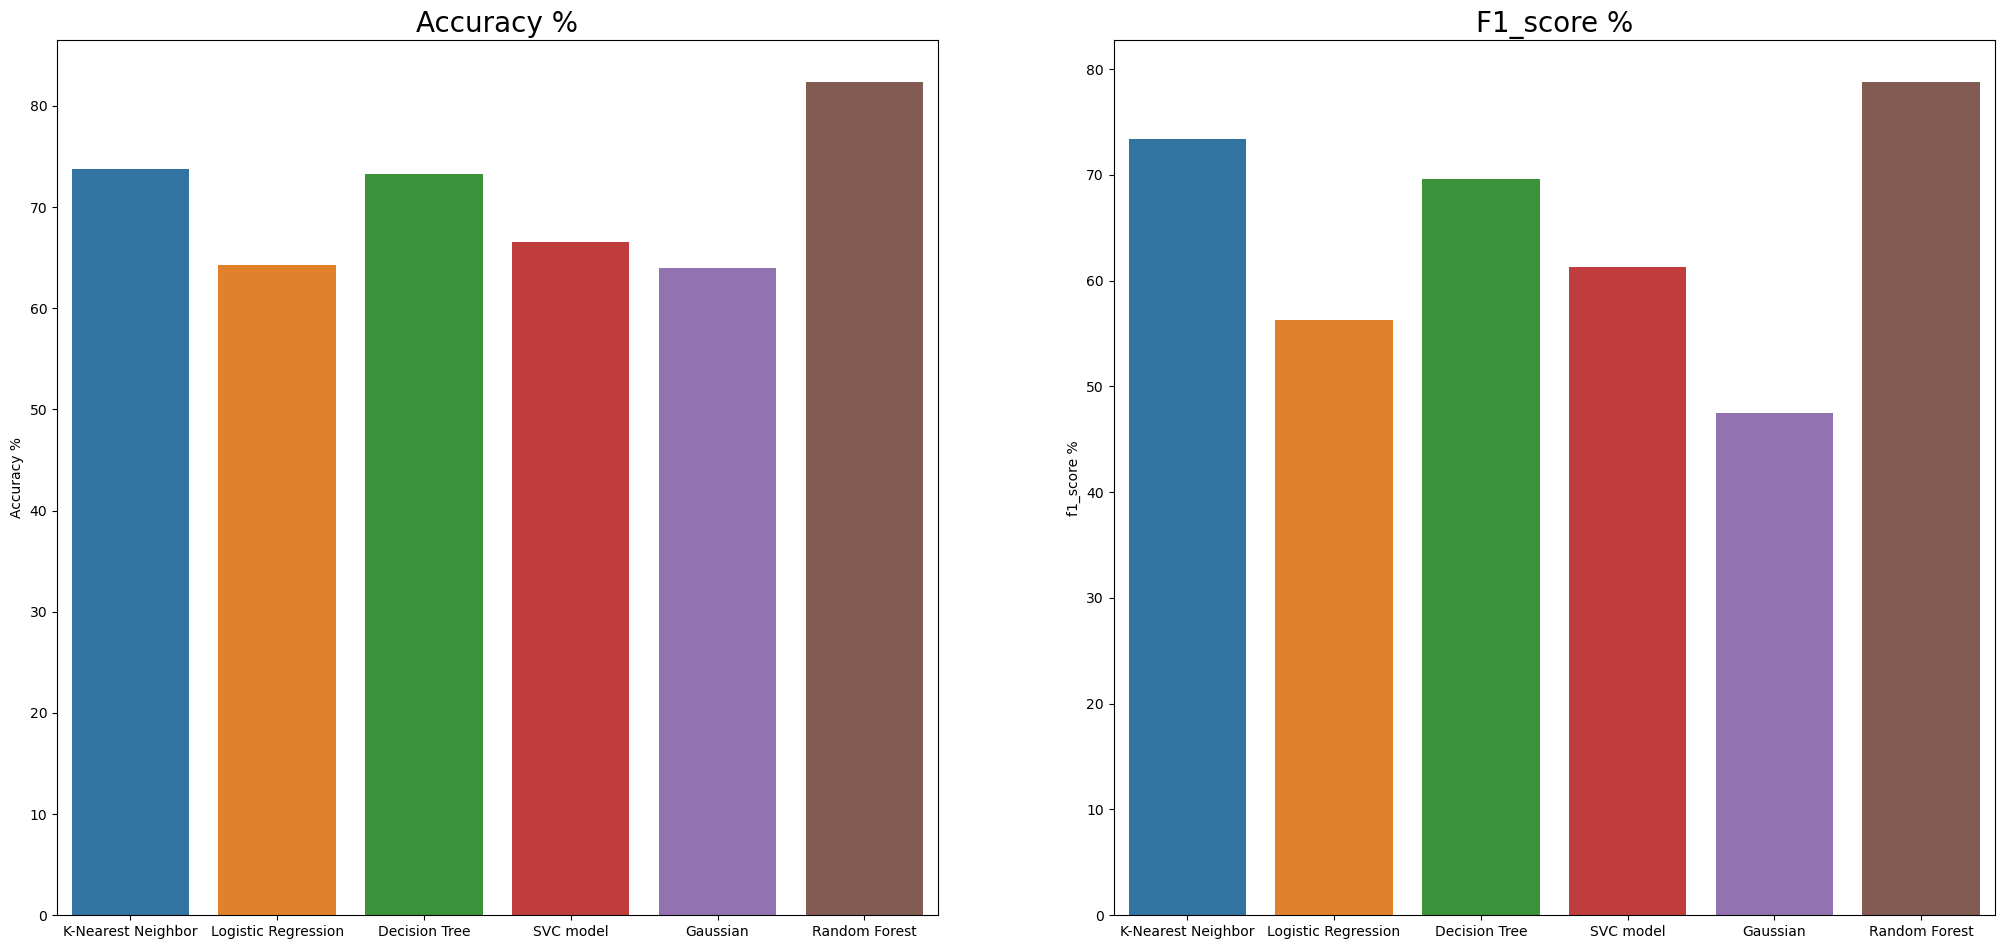

In [36]:
#Let's plot this comparison.

fig = plt.gcf()
fig.set_size_inches(25, 25)
titles = ['Accuracy %', 'F1_score %']
for title, label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y=comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title], fontsize=20)
    plt.grid(False)
plt.show()